In [2]:
library(quantmod)
library(showtext) 

font_add_google("Noto Sans SC", "NotoSansSC")
showtext_auto()

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: sysfonts

Loading required package: showtextdb



In [9]:
# 定义股票代码和数据范围
ticker <- "600900.SS"
startDate <- "2024-01-01"
endDate <- Sys.Date() # 使用当前日期作为结束日期

# 使用 getSymbols 获取数据
# 这个函数会默认创建一个与股票代码同名的 xts 对象（时间序列对象）
# 注意：R 会将 "600900.SS" 转换为一个合法的变量名，通常是 "X600900.SS"
# 为了方便，我们把它赋值给一个更简洁的变量名 CJDL (长江电力)
CJDL <- getSymbols(ticker, src = "yahoo", from = startDate, to = endDate, auto.assign = FALSE)

# 查看数据的前几行和后几行，确保数据已成功加载
# .Open, .High, .Low, .Close, .Volume, .Adjusted 分别代表开盘价、最高价、最低价、收盘价、成交量和复权收盘价
head(CJDL)
tail(CJDL)

           600900.SS.Open 600900.SS.High 600900.SS.Low 600900.SS.Close
2024-01-02          23.34          23.77         23.32           23.68
2024-01-03          23.67          23.80         23.60           23.76
2024-01-04          23.80          23.98         23.61           23.80
2024-01-05          23.78          23.95         23.66           23.74
2024-01-08          23.74          23.82         23.53           23.60
2024-01-09          23.60          23.68         23.30           23.54
           600900.SS.Volume 600900.SS.Adjusted
2024-01-02         68880298           22.33456
2024-01-03         60752512           22.41002
2024-01-04         61342335           22.44774
2024-01-05         70563121           22.39115
2024-01-08         65439403           22.25911
2024-01-09         80150503           22.20252

           600900.SS.Open 600900.SS.High 600900.SS.Low 600900.SS.Close
2025-08-12          27.69          27.88         27.64           27.76
2025-08-13          27.77          27.85         27.61           27.63
2025-08-14          27.62          27.89         27.60           27.66
2025-08-15          27.71          27.78         27.60           27.63
2025-08-18          27.64          27.72         27.55           27.64
2025-08-19          27.65          27.78         27.61           27.63
           600900.SS.Volume 600900.SS.Adjusted
2025-08-12         74318390              27.76
2025-08-13         93425687              27.63
2025-08-14        101758796              27.66
2025-08-15        107230233              27.63
2025-08-18        114736196              27.64
2025-08-19        114602398              27.63

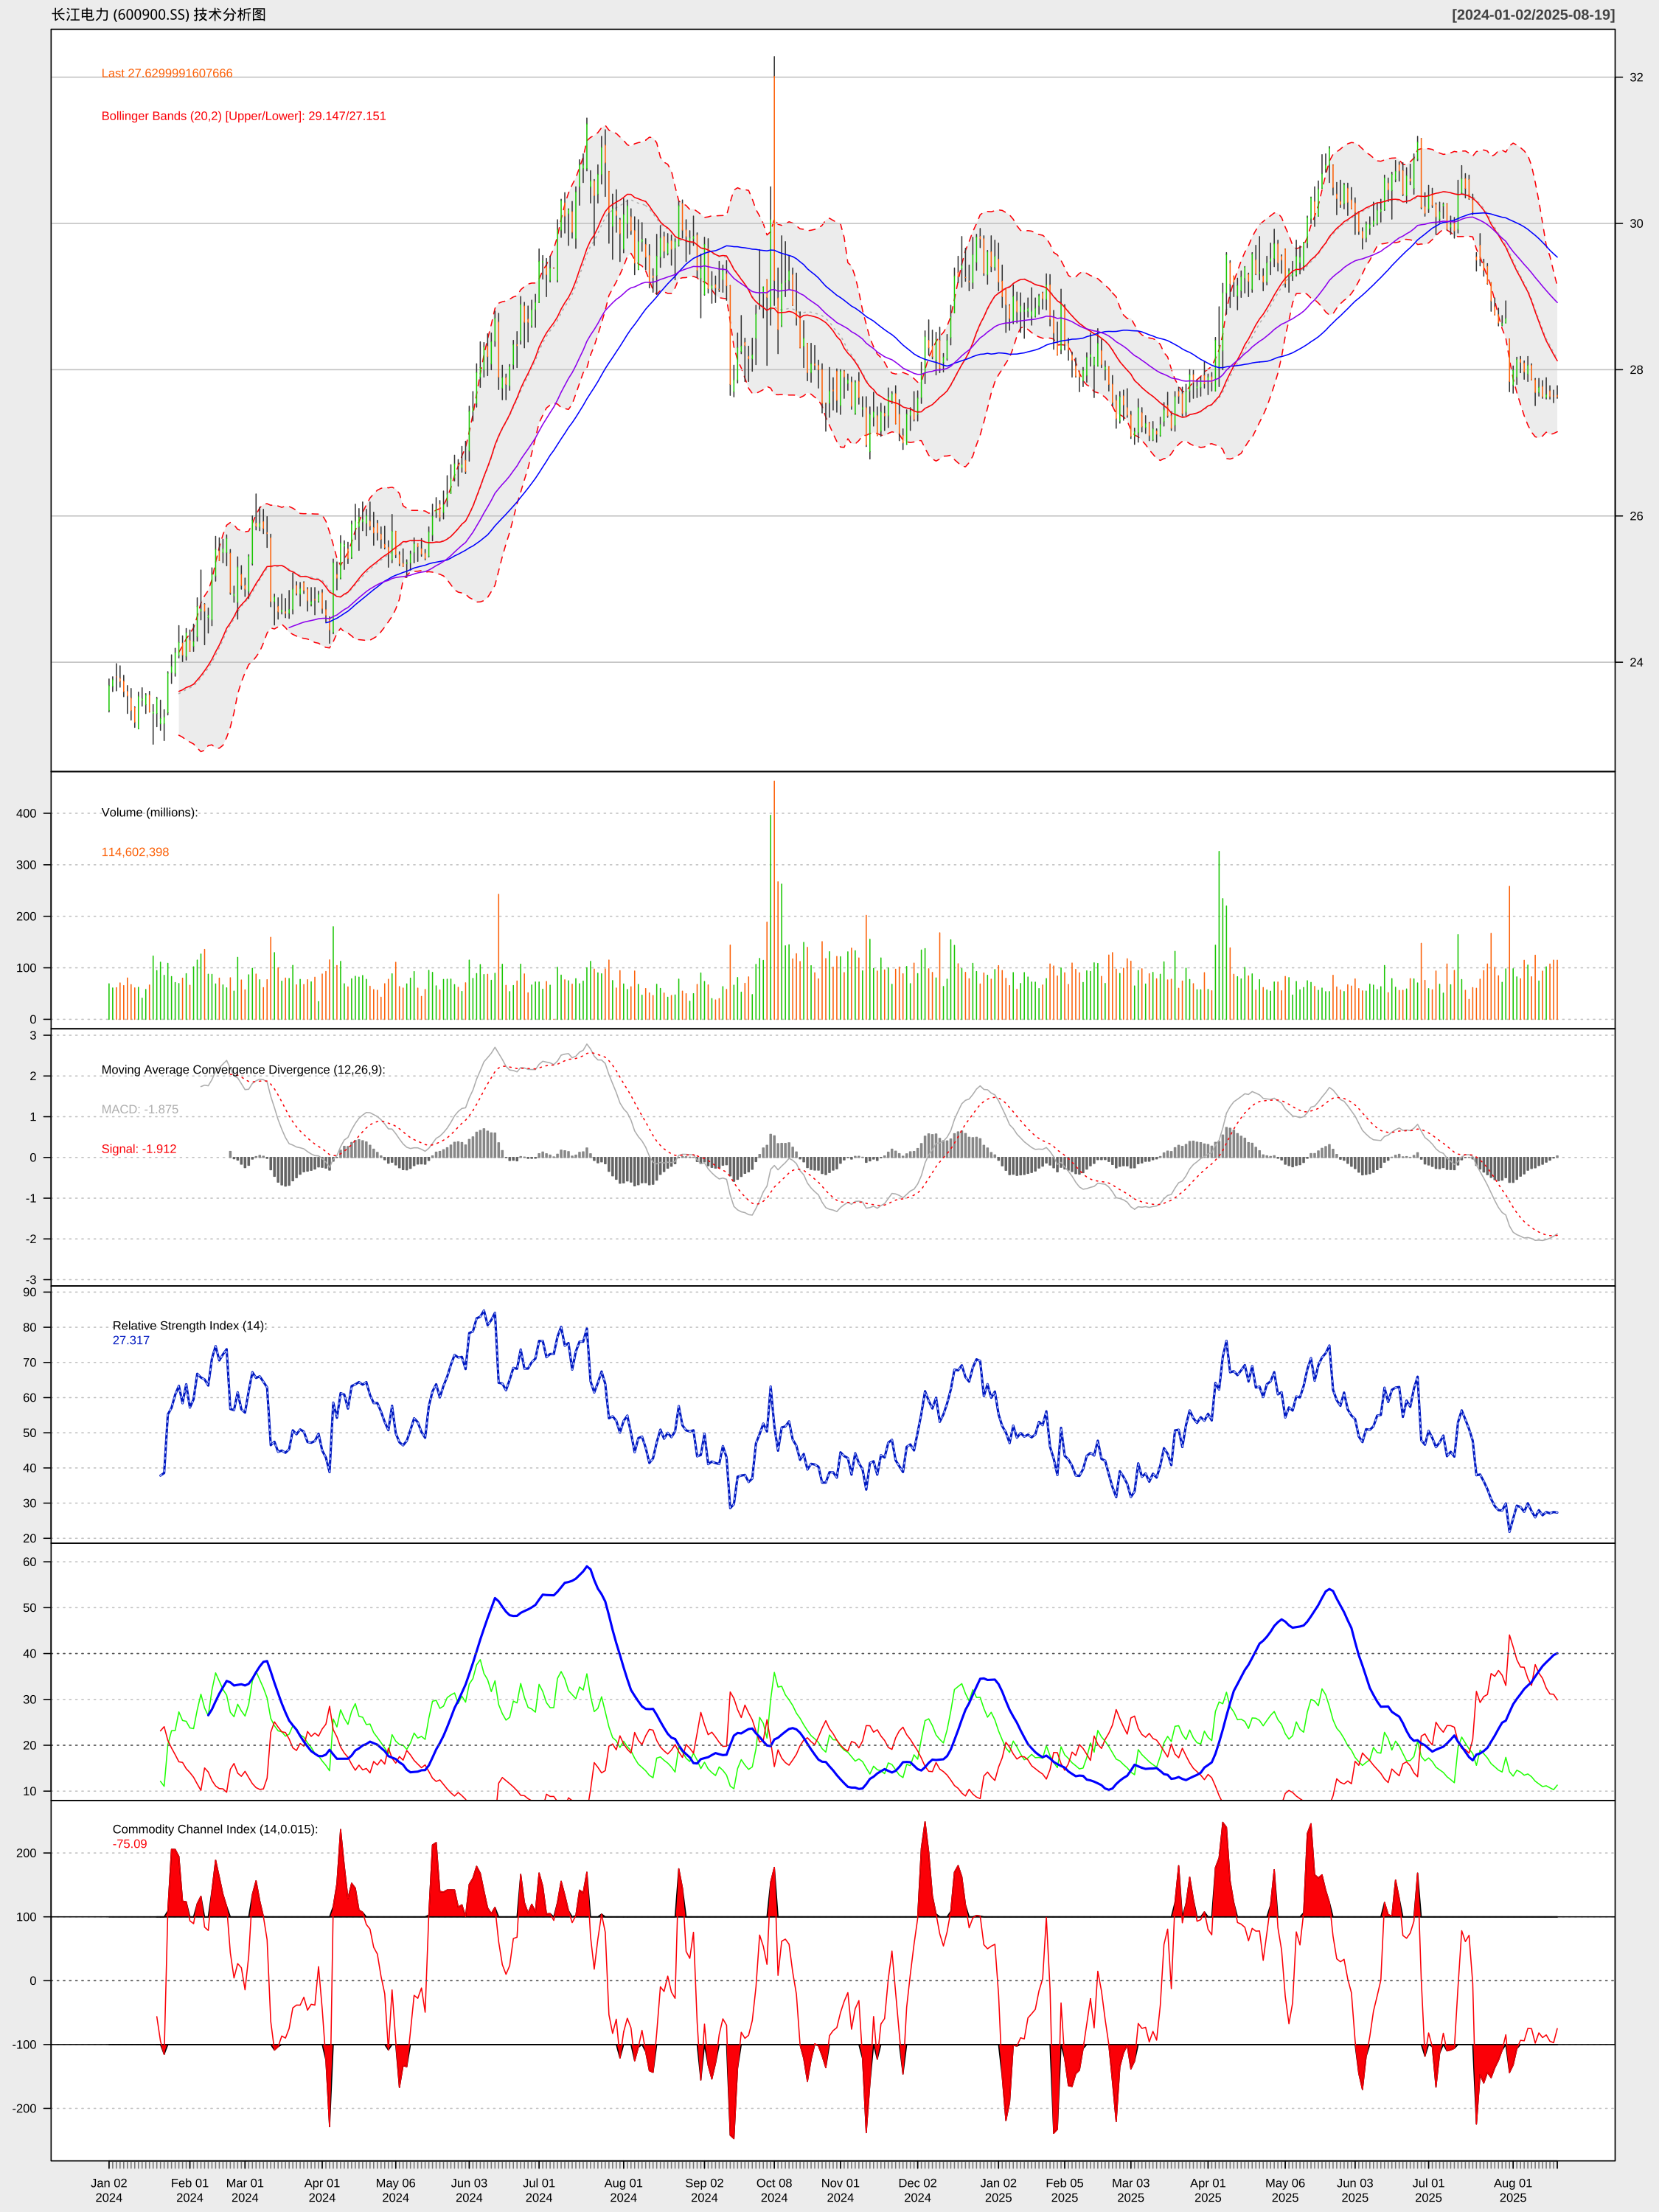

In [13]:
options(repr.plot.width = 15, repr.plot.height = 20, repr.plot.res = 150)


my_chart_theme <- chartTheme('white', family = 'Noto Sans SC')

# 3. 创建主图表
# 我们将成交量图（默认会添加）也明确地使用 addVo() 添加，这样可以更好地控制
chartSeries(CJDL, 
            theme = my_chart_theme, 
            name = "长江电力 (600900.SS) 技术分析图",
            
            # TA (Technical Analysis) 参数接收一个 R 的 list
            # 我们把所有 add...() 函数调用都放进这个 list 里
            TA = list(
                addVo(),
                addSMA(n = 20, on = 1, col = "red"),
                addSMA(n = 60, on = 1, col = "blue"),
                addEMA(n = 50, on = 1, col = "purple"), 
                addBBands(n = 20, sd = 2),
                addMACD(),
                addRSI(n = 14),                         
                addADX(), 
                addCCI(n = 14)
            )
)
